# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* La variable objetivo es aquella que buscamos predecir; en este dataset yo diría que puede ser algo como si votó o no.


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* EDA,PRE-PROCESAMIENTO,MODELADO,EVALUACIÓN,INSIGHT DE NEGOCIO


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* Personalmente priorizaría la AUC-ROC ya que mide la capacidad del modelo para distinguir entre clases. Un valor más alto indica un mejor rendimiento.


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* Esto es cuando el modelo se aprende tan bien los patrones de entrenamiento que se vuelve malo generalizand, lo podeos ver cuando en entrenamiento es muy bueno y a la hora de test en malo.


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K-means es un algoritmo de clustering porque agrupa los datos en k clústeres.


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* Es cuantitativa ya que la regresión busca predecir valores numéricos.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* 1) Tokenización: Este proceso divide un texto en unidades más pequeñas llamadas "tokens". Estos tokens suelen ser palabras, pero también pueden ser caracteres.
2) Eliminación de Stop Words: Las "stop words" son palabras comunes en un idioma (como "el", "la", "un", "una", "y", "o", etc.) que generalmente no aportan mucho significado al análisis de texto. Eliminarlas ayuda a reducir el ruido y a centrarse en las palabras más relevantes.


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* El parámetro k representa el número de clusters en los que quieres agrupar tus datos, es un valor que debemos especificar antes de ejecutar el algoritmo. Un k muy grande puede llevar a un sobreajuste (overfitting) en el contexto del clustering, donde los grupos identificados no representan patrones significativos o generalizables en los datos.


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Es una representación numérica de texto en un espacio de baja dimensión, es como convertir palabras en una lista de números.

La utilidad principal de los embeddings es capturar el significado y las relaciones entre las palabras, las palabras con significados similares o que aparecen en contextos parecidos estarán más cerca en este espacio; permitiendo que los modelos comprendan mejor el lenguaje, ya que pueden trabajar con estas representaciones numéricas en lugar de con el texto crudo.


## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [1]:
# Instala paquetes extra si los necesitas
# !pip install shap

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-06-04 04:57:34--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-06-04 04:57:34--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip’

amazon_review.csv.z 100%[===================>] 704.8

In [3]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
  inflating: amazon_review.csv       


In [4]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

In [5]:
df.shape

(4915, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [7]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [8]:
df.isna().sum()

,0
reviewerID,0
asin,0
reviewerName,1
helpful,0
reviewText,1
overall,0
summary,0
unixReviewTime,0
reviewTime,0
day_diff,0



Distribución de 'overall' (rating):
overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64
overall
5.0    0.797965
4.0    0.107223
1.0    0.049644
3.0    0.028891
2.0    0.016277
Name: proportion, dtype: float64


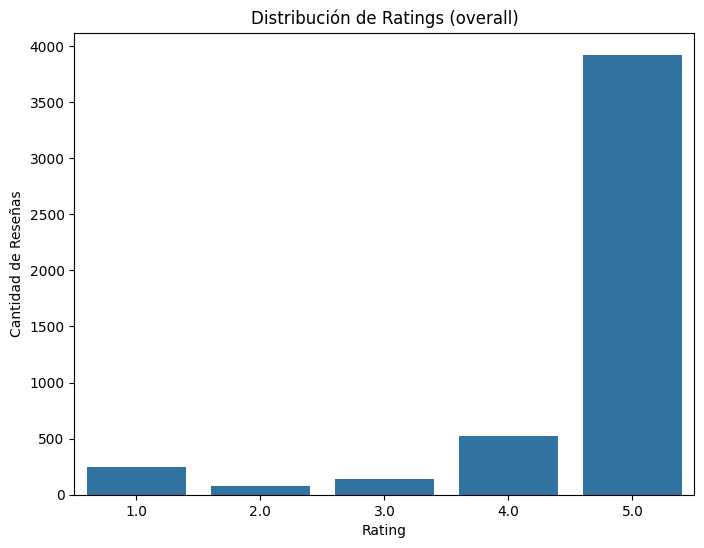

In [9]:
print("\nDistribución de 'overall' (rating):")
print(df['overall'].value_counts())
print(df['overall'].value_counts(normalize=True)) # En porcentajes
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title('Distribución de Ratings (overall)')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Reseñas')
plt.show()

In [10]:
df['sentimiento'] = df['overall'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')
print("\nDistribución de la variable objetivo 'sentimiento':")
print(df['sentimiento'].value_counts())
print(df['sentimiento'].value_counts(normalize=True))


Distribución de la variable objetivo 'sentimiento':
sentimiento
positivo    4449
negativo     466
Name: count, dtype: int64
sentimiento
positivo    0.905188
negativo    0.094812
Name: proportion, dtype: float64


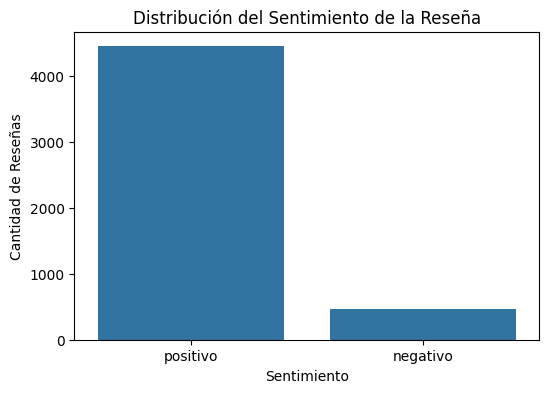

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimiento', data=df)
plt.title('Distribución del Sentimiento de la Reseña')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

### 4. Limpieza & Feature Engineering

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [12]:
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [13]:
df['positive'] = (df['overall'] >= 4).astype(int)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1


### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [14]:
text_cols = df[['summary', 'reviewText']].fillna('') # fillna handles potential NaN values
df['text'] = (text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive,text
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1,Four Stars. No issues.
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1,nothing to really say..... it works as expecte...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1,best deal around. Bought it with Retail Packag...


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [15]:
columns_to_drop = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'unixReviewTime', 'reviewTime', 'day_diff', 'helpful_yes', 'total_vote']

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents error if a column is not found

print("DataFrame after dropping irrelevant columns:")
print(df_cleaned.head())
print("\nInformation about the cleaned DataFrame:")
df_cleaned.info()

DataFrame after dropping irrelevant columns:
                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                  summary sentimiento review_datetime  \
0                              Four Stars    positivo      2014-07-23   
1                           MOAR SPACE!!!    positivo      2013-10-25   
2               nothing to really say....    positivo      2012-12-23   
3  Great buy at this price!!!  *** UPDATE    positivo      2013-11-21   
4                        best deal around    positivo      2013-07-13   

   positive                                               text  
0         1                             Four Stars. No issues.  
1         1  MOAR SPACE!!!. Purchased this for my

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])

# pipe.fit(X_train, y_train)

### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 109,   31],
       [  90, 1245]])

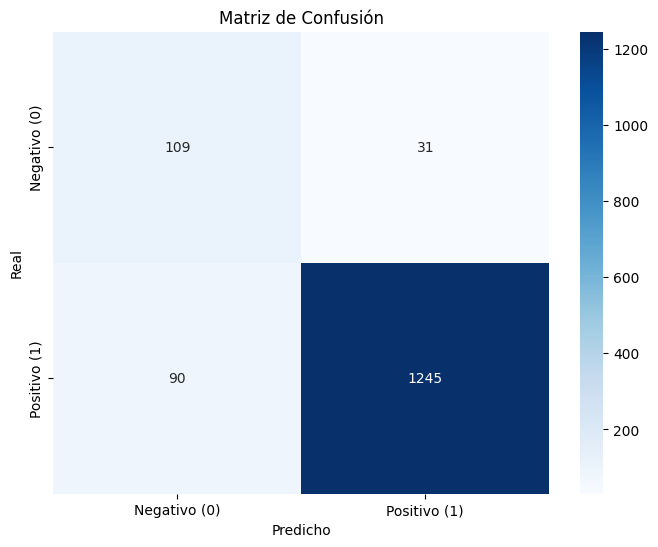

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo (0)', 'Positivo (1)'], yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [19]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475



### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [20]:
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar advertencia
cluster = kmeans.fit_predict(X_vec)

df['cluster'] = cluster
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive,text,cluster
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1,Four Stars. No issues.,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i...",3
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1,nothing to really say..... it works as expecte...,3
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...,2
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1,best deal around. Bought it with Retail Packag...,3


In [21]:
print("\nDistribución de reseñas por cluster:")
print(df['cluster'].value_counts())


Distribución de reseñas por cluster:
cluster
3    1730
2    1222
1    1123
4     790
0      50
Name: count, dtype: int64


#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [22]:

# prompt: Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

print("\n--- Perfil de Clusters ---")

# Iterar sobre cada cluster para analizar su perfil
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")

    # Filtrar el DataFrame para el cluster actual
    cluster_df = df[df['cluster'] == cluster_id]
    num_reviews = len(cluster_df)

    print(f"Total de reseñas en este cluster: {num_reviews}")

    # Análisis de la variable 'positive' (sentimiento binario)
    print("\nDistribución de Sentimiento (Positivo/Negativo):")
    print(cluster_df['positive'].value_counts(normalize=True)) # Mostrar porcentajes

    # Análisis de la variable 'helpful' (votos útiles) - estadísticas descriptivas
    # Asegúrate de que 'helpful' es numérico. Si es una cadena, puedes necesitar convertirla.
    # Aquí asumimos que 'helpful' en el df original ya era numérico o se limpió antes del drop.
    # Si usaste df_cleaned para el clustering, podrías necesitar re-unir las columnas relevantes.
    # Si el clustering se hizo sobre df['text'], entonces podemos usar el df original.
    if 'helpful' in cluster_df.columns:
        print("\nEstadísticas descriptivas de Votos Útiles ('helpful'):")
        print(cluster_df['helpful'].describe())
    else:
        print("\nLa columna 'helpful' no está disponible en el DataFrame del cluster.")


    # Análisis de la variable 'review_length'
    if 'review_length' in cluster_df.columns:
        print("\nEstadísticas descriptivas de la Longitud de la Reseña:")
        print(cluster_df['review_length'].describe())
    else:
         print("\nLa columna 'review_length' no está disponible en el DataFrame del cluster.")


    # Análisis de las palabras más frecuentes en el texto del cluster
    # Puedes tomar una muestra si el cluster es muy grande
    sample_text = ' '.join(cluster_df['text'].sample(min(1000, num_reviews), replace=True).tolist())

    # Usar el mismo vectorizador TF-IDF (o uno nuevo si quieres) para analizar el texto del cluster
    # Para simple frecuencia, puedes usar CountVectorizer o analizar la cadena directamente
    from collections import Counter
    import re

    words = re.findall(r'\b\w+\b', sample_text.lower()) # Extrae palabras, convierte a minúsculas
    stop_words = set(['el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'de', 'en', 'y', 'a', 'que', 'es', 'con', 'para', 'del', 'al', 'se', 'por', 'su', 'sus', 'como', 'mas', 'pero', 'este', 'esta', 'si', 'no', 'cuando', 'donde', 'porque', 'muy', 'mi', 'mis', 'tu', 'tus', 'el', 'ella', 'nosotros', 'vosotros', 'ellos', 'las', 'los']) # Ejemplo de stop words en español

    # Filtrar stop words
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

    word_counts = Counter(filtered_words)
    print("\nPalabras más frecuentes (Top 10):")
    print(word_counts.most_common(10))

    print("-" * (len(f"--- Cluster {cluster_id} ---"))) # Separador para el siguiente cluster



--- Perfil de Clusters ---

--- Cluster 0 ---
Total de reseñas en este cluster: 50

Distribución de Sentimiento (Positivo/Negativo):
positive
1    1.0
Name: proportion, dtype: float64

Estadísticas descriptivas de Votos Útiles ('helpful'):
count         50
unique         1
top       [0, 0]
freq          50
Name: helpful, dtype: object

La columna 'review_length' no está disponible en el DataFrame del cluster.

Palabras más frecuentes (Top 10):
[('stars', 52), ('five', 48), ('it', 16), ('and', 16), ('my', 16), ('great', 12), ('works', 11), ('card', 10), ('good', 10), ('well', 9)]
-----------------

--- Cluster 1 ---
Total de reseñas en este cluster: 1123

Distribución de Sentimiento (Positivo/Negativo):
positive
1    0.772039
0    0.227961
Name: proportion, dtype: float64

Estadísticas descriptivas de Votos Útiles ('helpful'):
count       1123
unique        38
top       [0, 0]
freq         874
Name: helpful, dtype: object

La columna 'review_length' no está disponible en el DataFrame d

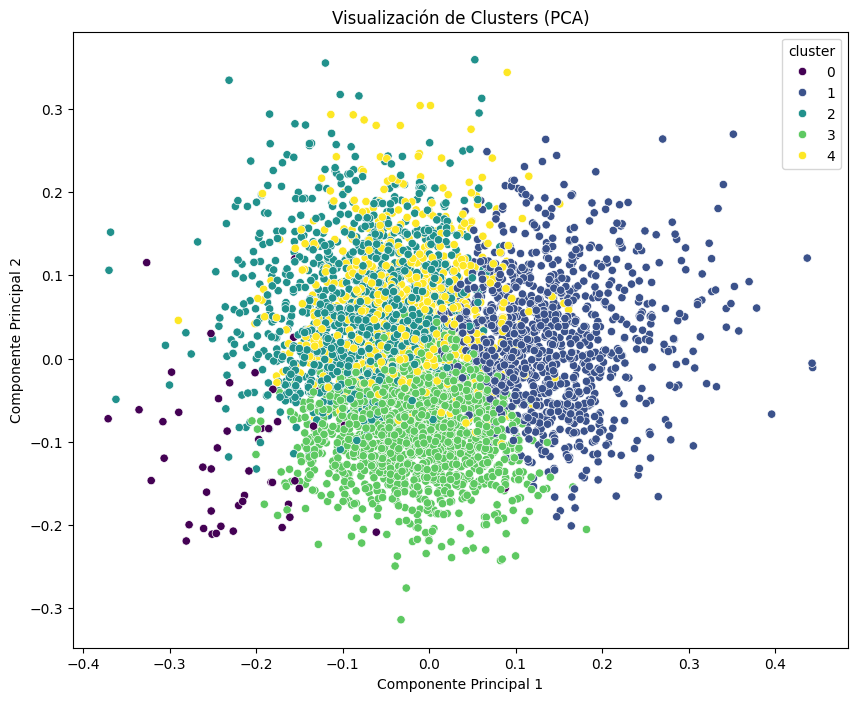

In [23]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF vectors
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vec.toarray())

# Add the PCA components to the dataframe
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='viridis', legend='full')
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

**ANÁLISIS FINAL**

El modelo de muestra un buen desempeño general, alcanzando una precisión del 92%. Sin embargo, al analizar con mayor detalle la matriz de confusión y el informe de métricas, se evidencian oportunidades de mejora.

En cuanto a los falsos negativos (reseñas positivas que el modelo clasificó incorrectamente como negativas), se detectaron 90 casos. Para entender este tipo de error, es útil examinar a qué grupo o cluster pertenecen estas reseñas. Si muchas de ellas están concentradas en un mismo grupo, es posible que compartan características particulares, como el uso de sarcasmo o comentarios mixtos (con aspectos tanto positivos como negativos) que podrían estar confundiendo al modelo.

Respecto a los falsos positivos (reseñas negativas que fueron clasificadas como positivas), se encontraron 31 casos. Esto podría deberse al uso de palabras con connotaciones positivas dentro de mensajes que, en su conjunto, son negativos. Analizar los grupos donde estos errores son más comunes puede ayudar a identificar patrones lingüísticos que estén afectando la precisión del modelo.


**ACCIONES DE NEGOCIO**

**1) Mejora de la Experiencia del Cliente para Reseñas Negativas o Mixtas.**

Enfocarse en las reseñas clasificadas negativas por el modelo, especialmente aquellas que podrían ser falsos negativos o que provengan de clusters con una proporción significativa de sentimiento negativo. Implementar un proceso para que un equipo de atención al cliente revise manualmente estas reseñas. Lo que no solo ayudará a corregir las etiquetas de entrenamiento para mejorar el modelo a futuro, sino que, más importante aún, permitirá identificar problemas específicos que están generando frustración en los clientes y tomar acciones correctivas.


**2) Apalancamiento de Reseñas Positivas para Marketing y Mejora Continua.**

Utilizar las reseñas clasificadas como positivas y los insights de los clusters predominantemente positivos para identificar qué aspectos del producto o servicio son más valorados por los clientes, esta información puede ser utilizada para campañas de marketing destacando esos puntos fuertes. Adicionalmente, analizar estas reseñas positivas y sus clusters para entender qué "buenas prácticas" o características generan experiencias excepcionales, y busca cómo replicar esos aspectos en otras áreas o productos.

## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
